### EDA of Stackoverflow data
*I find exploratory data analysis (EDA) as powerful tool to understand data and get much useful information. Therefore, I will try apply some EDA techniques to discover stackoverflow data. I will keep columns that have missing values less than 20% and find out career satisfaction level across countries, professions and major undergraduates.*
Our questions are:

* What is distribution of career satisfaction? Is it normally distributed or it is skewed?
* Which countries (respondents more than 300) are more satisfied as professional developers? Or in other words where it is good to be professional developer?
* Which undergraduate majors are happier as professional developer? Are undergraduates of computer science undergraduate programms happier than undergraduates of social sciences?

###### ***importing data & libraries that will be used for analysis***

In [251]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

public = pd.read_csv("D:\dsn\survey_results_public.csv")
##schema = pd.read_csv("D:\dsn\survey_results_schema.csv")

##### inpecting data frame

In [252]:
print(public.shape)
public.iloc[0:5]

(51392, 154)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### how much percentage of each columns have missing values

In [253]:
round((public.isnull().sum().sort_values(ascending = False) / public.shape[0]) * 100,0)

ExCoder10Years               98.0
ExCoderNotForMe              98.0
ExCoderWillNotCode           98.0
ExCoderReturn                98.0
ExCoderBalance               98.0
ExCoderBelonged              98.0
ExCoderActive                98.0
ExCoderSkills                98.0
YearsCodedJobPast            98.0
MobileDeveloperType          97.0
ExpectedSalary               95.0
TimeAfterBootcamp            95.0
NonDeveloperType             90.0
WebDeveloperType             79.0
Salary                       75.0
Overpaid                     74.0
HaveWorkedFramework          61.0
HoursPerWeek                 60.0
Currency                     58.0
InfluenceConsultants         58.0
InfluenceCommunication       58.0
InfluenceServers             58.0
InfluenceRecruitment         58.0
InfluenceDeptTech            58.0
InfluenceCloud               58.0
InfluenceTechStack           58.0
InfluenceVizTools            58.0
InfluenceDatabase            58.0
InfluenceWorkstation         58.0
InfluenceHardw

#### I will keep variables which has missing values <= 20%

In [254]:
few_missing = []
for i in public.columns:
    if((public[i].isnull().sum() / public.shape[0]) * 100  <= 20):
        print(i)
        few_missing.append(i)

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
YearsProgram
CareerSatisfaction
PronounceGIF
ClickyKeys


#### I have created new dataframe (df) which contains columns with missing values less than 20%

In [257]:
df = public[few_missing]
df

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,YearsProgram,CareerSatisfaction,PronounceGIF,ClickyKeys
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,2 to 3 years,NaN,"With a soft ""g,"" like ""jiff""",Yes
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",9 to 10 years,NaN,"With a hard ""g,"" like ""gift""",No
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...",20 or more years,8.0,"With a hard ""g,"" like ""gift""",Yes
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",14 to 15 years,6.0,"With a soft ""g,"" like ""jiff""",Yes
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,20 or more years,6.0,"With a soft ""g,"" like ""jiff""",NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,6 to 7 years,NaN,"With a hard ""g,"" like ""gift""",Yes
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",9 to 10 years,7.0,"With a hard ""g,"" like ""gift""",Yes
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),10 to 11 years,7.0,"With a hard ""g,"" like ""gift""",Yes
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...",13 to 14 years,6.0,"With a hard ""g,"" like ""gift""",Yes
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,13 to 14 years,6.0,"With a soft ""g,"" like ""jiff""",Yes


##### inspecting data types of the new dataframe

In [258]:
df.dtypes

# only CareerStatisfaction column is numeric the rest is string

Respondent              int64
Professional           object
ProgramHobby           object
Country                object
University             object
EmploymentStatus       object
FormalEducation        object
MajorUndergrad         object
HomeRemote             object
YearsProgram           object
CareerSatisfaction    float64
PronounceGIF           object
ClickyKeys             object
dtype: object

##### lets first have a look at distribution of career satisfaction. Distribution is left skewed and we can conclude that majority of respondents satisfied with their career.

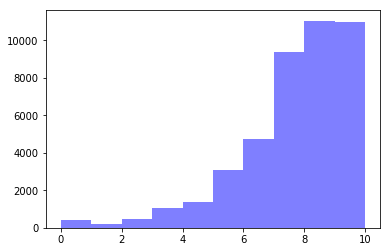

In [260]:
cs  = list(df["CareerSatisfaction"].dropna())
age
plt.hist(cs, 10, facecolor='blue', alpha=0.5)
plt.show()

##### Let's see which professions have higher or less satisfaction. We check mean of career satisfaction by each levels of profession. Professional developers seem happier than others

In [250]:
print(df[['Professional','CareerSatisfaction']].groupby(df['Professional']).mean())
print(df['Professional'].groupby(df['Professional']).count())

                                                    CareerSatisfaction
Professional                                                          
None of these                                                 6.113850
Professional developer                                        7.422040
Professional non-developer who sometimes writes...            6.757354
Student                                                       5.600000
Used to be a professional developer                           6.701863
Professional
None of these                                             914
Professional developer                                  36131
Professional non-developer who sometimes writes code     5140
Student                                                  8224
Used to be a professional developer                       983
Name: Professional, dtype: int64


##### Which are top 50 countries that are represented in our data? We have some countries with few population (Lithuania,Israel,Singapore) that are represented amoung top 50 countries.

In [261]:
df['Country'].groupby(df['Country']).count().sort_values(ascending=False)[0:49]

Country
United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Netherlands             855
Italy                   781
Brazil                  777
Sweden                  611
Switzerland             595
Israel                  575
Romania                 561
Iran                    507
Austria                 477
Pakistan                454
Czech Republic          411
Belgium                 404
South Africa            380
Turkey                  363
Ukraine                 356
Mexico                  351
Ireland                 345
Hungary                 332
Philippines             328
Slovenia                303
Denmark                 300
Greece                  298
Indonesia               289
Finland                 287
Portugal                271
Norway      

##### We will look at countries that have respondents >= 300 people and check mean of satisfaction by professions to determine which countries are happier as professional developers.
##### We see that professional developers in Mexico, Israel & the USA seem more satisfied while professional developers in Tukey, Italy & India has lower satisfaction level

In [265]:
country_list = []
for i in df.Country.unique():
    if(df.Country[df.Country == i].shape[0] >= 300):
        country_list.append(i)

In [266]:
top_countries = df.loc[df['Country'].isin(country_list)]

In [267]:
pd.crosstab(index=top_countries['Country'], columns=top_countries['Professional'], values=top_countries['CareerSatisfaction'], colnames=['Profession'], aggfunc='mean').sort_values('Professional developer', ascending=False)

Profession,None of these,Professional developer,Professional non-developer who sometimes writes code,Student,Used to be a professional developer
Country,,,,,
Mexico,8.333333,8.482625,8.342105,NaN,7.333333
Israel,7.666667,8.079295,6.439024,NaN,6.000000
United States,6.318584,7.767416,7.198480,NaN,7.118143
Canada,7.100000,7.737901,7.071038,NaN,7.265306
Romania,3.857143,7.684086,7.028571,6.0,7.555556
Netherlands,6.611111,7.642478,7.290698,NaN,7.500000
Australia,6.150000,7.582160,6.891892,NaN,5.880000
Denmark,5.285714,7.578475,7.636364,NaN,8.400000
South Africa,6.333333,7.514851,6.175000,NaN,5.666667


##### Which major undergraduates are happier as professional developers? Seems that respondents with business, social sciences majors are happier than computer science related undergrads

In [272]:
fe = public.loc[(public.Professional == "Professional developer") & (public.HomeRemote.notnull()) ,["Professional","FormalEducation","MajorUndergrad","CareerSatisfaction"]]

In [274]:
pd.crosstab(index=fe['MajorUndergrad'], columns=fe['Professional'], values=fe['CareerSatisfaction'], colnames=['Profession'], aggfunc='mean').sort_values("Professional developer",ascending=False)

Profession,Professional developer
MajorUndergrad,
A business discipline,7.705455
Fine arts or performing arts,7.653928
Psychology,7.607692
A social science,7.602532
A health science,7.551724
Management information systems,7.547826
A humanities discipline,7.544426
I never declared a major,7.519324
A natural science,7.485866


#### Based on our data we can conclude the following:

* Generally professional developers happier in their career
* Some small countries (by population) like Israel, Lithuania have enough respondents
* Developers in the USA, Israel, Mexico and Canada are happier than in other countries. Developers in Italy, Turkey and India seems less happier with their career
* Respondents with business and social sciences undergraduate majors are happier than respondets with computer science related undergrad